<a href="https://colab.research.google.com/gist/Votanluan52/bc4d81d5e52b5954e5035c99abb6e527/baicuoikyai.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import glob
import cv2
import os
from os import listdir
from numpy import asarray
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from keras.layers import Dense,Activation,BatchNormalization, Dropout, LSTM, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.models import Sequential
from tensorflow.keras.optimizers import RMSprop, SGD
from keras.utils import np_utils
from tensorflow.keras.preprocessing.image import load_img, img_to_array

In [ ]:
folder1 = '/content/drive/MyDrive/Train/Bach_dang_nk'
folder2 = '/content/drive/MyDrive/Train/Cao_su'
folder3 = '/content/drive/MyDrive/Train/Bo_de'
folder4 = '/content/drive/MyDrive/Train/Cam_lai'
folder5 = '/content/drive/MyDrive/Train/Dang_huong'
folder6 = '/content/drive/MyDrive/Train/Lim'
folder7 = '/content/drive/MyDrive/Train/Gu_lao'
folder8 = '/content/drive/MyDrive/Train/Mun'
folder9 = '/content/drive/MyDrive/Train/Que'
folder10 = '/content/drive/MyDrive/Train/Anh_dao'
folder11 = '/content/drive/MyDrive/Train/Bach_xanh'
folder12 = '/content/drive/MyDrive/Train/Keo_lai'
folder13 = '/content/drive/MyDrive/Train/Xa_cu'
folder14 = '/content/drive/MyDrive/Train/Tram_hong'
folder15 = '/content/drive/MyDrive/Train/Thuy_tung'
photos, labels = list(), list()

for file in listdir(folder1):
  photo = load_img(folder1+'/'+file, target_size=(150,150))
  photo = img_to_array(photo)
  photos.append(photo)              
  labels.append(0) 
for file in listdir(folder2):
  photo = load_img(folder2+'/'+file, target_size=(150,150))
  photo = img_to_array(photo)
  photos.append(photo)              
  labels.append(1) 
for file in listdir(folder3):
  photo = load_img(folder3+'/'+file, target_size=(150,150))
  photo = img_to_array(photo)
  photos.append(photo)              
  labels.append(2)
for file in listdir(folder4):
  photo = load_img(folder4+'/'+file, target_size=(150,150))
  photo = img_to_array(photo)
  photos.append(photo)              
  labels.append(3) 
for file in listdir(folder5):
  photo = load_img(folder5+'/'+file, target_size=(150,150))
  photo = img_to_array(photo)
  photos.append(photo)              
  labels.append(4) 
for file in listdir(folder6):
  photo = load_img(folder6+'/'+file, target_size=(150,150))
  photo = img_to_array(photo)
  photos.append(photo)              
  labels.append(5)
for file in listdir(folder7):
  photo = load_img(folder7+'/'+file, target_size=(150,150))
  photo = img_to_array(photo)
  photos.append(photo)              
  labels.append(6) 
for file in listdir(folder8):
  photo = load_img(folder8+'/'+file, target_size=(150,150))
  photo = img_to_array(photo)
  photos.append(photo)              
  labels.append(7) 
for file in listdir(folder9):
  photo = load_img(folder9+'/'+file, target_size=(150,150))
  photo = img_to_array(photo)
  photos.append(photo)              
  labels.append(8)
for file in listdir(folder10):
  photo = load_img(folder10+'/'+file, target_size=(150,150))
  photo = img_to_array(photo)
  photos.append(photo)              
  labels.append(9) 
for file in listdir(folder11):
  photo = load_img(folder11+'/'+file, target_size=(150,150))
  photo = img_to_array(photo)
  photos.append(photo)              
  labels.append(10) 
for file in listdir(folder12):
  photo = load_img(folder12+'/'+file, target_size=(150,150))
  photo = img_to_array(photo)
  photos.append(photo)              
  labels.append(11)
for file in listdir(folder13):
  photo = load_img(folder13+'/'+file, target_size=(150,150))
  photo = img_to_array(photo)
  photos.append(photo)              
  labels.append(12) 
for file in listdir(folder14):
  photo = load_img(folder14+'/'+file, target_size=(150,150))
  photo = img_to_array(photo)
  photos.append(photo)              
  labels.append(13) 
for file in listdir(folder15):
  photo = load_img(folder15+'/'+file, target_size=(150,150))
  photo = img_to_array(photo)
  photos.append(photo)              
  labels.append(14)

photos = asarray(photos)           
labels = asarray(labels)            
class_name = ['BACH_DANG','CAO SU','BỒ ĐỀ','CẨM LAI','ĐÀNG HƯƠNG','LIM','GỤ LAO','MUN','QUE','ANH DAO','BACH XANH','KEO LAI','XA CU','TRAM HONG','THUY TUNG']  
print(photos.shape, labels.shape, class_name)

(5726, 150, 150, 3) (5726,) ['BACH_DANG', 'CAO SU', 'BỒ ĐỀ', 'CẨM LAI', 'ĐÀNG HƯƠNG', 'LIM', 'GỤ LAO', 'MUN', 'QUE', 'ANH DAO', 'BACH XANH', 'KEO LAI', 'XA CU', 'TRAM HONG', 'THUY TUNG']


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(photos, labels, test_size=0.25, random_state=5)   #tạo dữ liệu train 75% và test 25%
print(x_train.shape,x_test.shape)
print(y_train.shape,y_test.shape)

(4294, 150, 150, 3) (1432, 150, 150, 3)
(4294,) (1432,)


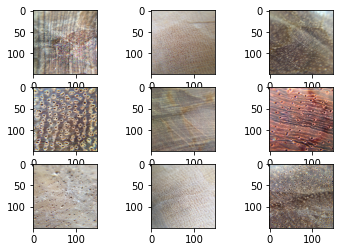

In [ ]:
x_train_show = x_train.astype(int)            
import matplotlib.pyplot as plt
from matplotlib.image import imread
for i in range(9):
  plt.subplot(330+i+1)
  plt.imshow(x_train_show[i])
plt.show()

In [ ]:
x_train/=255
x_test/=255
y_train=np_utils.to_categorical(y_train)
y_test=np_utils.to_categorical(y_test)

In [ ]:
model = Sequential()
model.add(Conv2D(32,(3,3), activation = 'relu', kernel_initializer='he_uniform',padding='same',input_shape=(150,150,3)))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(64,(3,3), activation = 'relu', kernel_initializer='he_uniform',padding='same',))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(128,(3,3), activation = 'relu', kernel_initializer='he_uniform',padding='same',))
model.add(MaxPooling2D((2,2)))

In [ ]:
model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))  #Dense la full connected 
model.add(Dense(15, activation='Softmax'))
opt = SGD(lr=0.01, momentum=0.9)
model.compile(optimizer=opt,loss='categorical_crossentropy',  metrics=['accuracy'])
history = model.fit(x_train,y_train, batch_size=64,epochs=200,verbose=1,validation_data = (x_test, y_test))
model.save('/content/drive/MyDrive/go.h5')

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/200
68/68 [==============================] - 18s 80ms/step - loss: 2.4906 - accuracy: 0.1884 - val_loss: 1.9607 - val_accuracy: 0.3345
Epoch 2/200
68/68 [==============================] - 4s 61ms/step - loss: 1.9758 - accuracy: 0.3430 - val_loss: 1.9220 - val_accuracy: 0.4022
Epoch 3/200
68/68 [==============================] - 4s 59ms/step - loss: 1.3234 - accuracy: 0.5368 - val_loss: 1.0428 - val_accuracy: 0.6453
Epoch 4/200
68/68 [==============================] - 4s 60ms/step - loss: 0.9073 - accuracy: 0.6926 - val_loss: 1.9852 - val_accuracy: 0.4679
Epoch 5/200
68/68 [==============================] - 4s 60ms/step - loss: 0.8479 - accuracy: 0.7122 - val_loss: 0.6662 - val_accuracy: 0.7514
Epoch 6/200
68/68 [==============================] - 4s 60ms/step - loss: 0.5965 - accuracy: 0.7948 - val_loss: 1.0372 - val_accuracy: 0.6557
Epoch 7/200
68/68 [==============================] - 4s 60ms/step - loss: 0.4147 - accuracy: 0.8512 - val_loss: 1.5599 - val_accuracy: 0.6027
Epoch

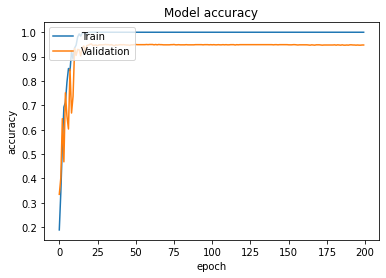

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train','Validation'], loc='upper left')

In [ ]:
from tensorflow.keras.models import load_model
from keras.layers import Concatenate
import tensorflow as tf
model_CNN_WOOD = load_model('/content/drive/MyDrive/go.h5')

[[1.5150181e-24 3.1150762e-37 1.9473463e-19 5.1956030e-21 7.8214588e-27
  2.0665408e-37 3.2354710e-24 7.2698537e-26 2.2637955e-31 1.0000000e+00
  7.1134260e-35 3.4482392e-26 2.7834409e-14 1.2473034e-18 1.4241192e-23]]
ĐÂY LÀ ANH DAO


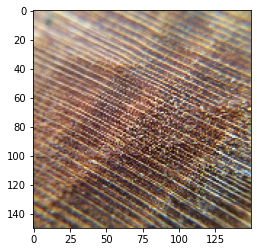

In [ ]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import array_to_img
from google.colab.patches import cv2_imshow
# Load model Nhận diện  

img = load_img('/content/drive/MyDrive/Train/Anh_dao/101.jpg', target_size=(150,150))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,150,150,3)
img = img.astype('float32')
img/=255.0

a = np.argmax(model_CNN_WOOD.predict(img), axis=-1)
print(model_CNN_WOOD.predict(img))
print('ĐÂY LÀ',class_name[int(a)])

In [ ]:
from IPython.display import display, Javascript, Image
# JavaScript to properly create our live video stream using our webcam as input

def video_stream():
  js = Javascript('''
    var video;
    var div = null;
    var stream;
    var captureCanvas;
    var imgElement;
    var labelElement;
    
    var pendingResolve = null;
    var shutdown = false;
    
    function removeDom() {
       stream.getVideoTracks()[0].stop();
       video.remove();
       div.remove();
       video = null;
       div = null;
       stream = null;
       imgElement = null;
       captureCanvas = null;
       labelElement = null;
    }
    
    function onAnimationFrame() {
      if (!shutdown) {
        window.requestAnimationFrame(onAnimationFrame);
      }
      if (pendingResolve) {
        var result = "";
        if (!shutdown) {
          captureCanvas.getContext('2d').drawImage(video, 0, 0, 640, 480);
          result = captureCanvas.toDataURL('image/jpeg', 0.8)
        }
        var lp = pendingResolve;
        pendingResolve = null;
        lp(result);
      }
    }
    
    async function createDom() {
      if (div !== null) {
        return stream;
      }

      div = document.createElement('div');
      div.style.border = '2px solid black';
      div.style.padding = '3px';
      div.style.width = '100%';
      div.style.maxWidth = '600px';
      document.body.appendChild(div);
      
      const modelOut = document.createElement('div');
      modelOut.innerHTML = "<span>Status:</span>";
      labelElement = document.createElement('span');
      labelElement.innerText = 'No data';
      labelElement.style.fontWeight = 'bold';
      modelOut.appendChild(labelElement);
      div.appendChild(modelOut);
           
      video = document.createElement('video');
      video.style.display = 'block';
      video.width = div.clientWidth - 6;
      video.setAttribute('playsinline', '');
      video.onclick = () => { shutdown = true; };
      stream = await navigator.mediaDevices.getUserMedia(
          {video: { facingMode: "environment"}});
      div.appendChild(video);

      imgElement = document.createElement('img');
      imgElement.style.position = 'absolute';
      imgElement.style.zIndex = 1;
      imgElement.onclick = () => { shutdown = true; };
      div.appendChild(imgElement);
      
      const instruction = document.createElement('div');
      instruction.innerHTML = 
          '<span style="color: red; font-weight: bold;">' +
          'Bấm vào video để dừng</span>';
      div.appendChild(instruction);
      instruction.onclick = () => { shutdown = true; };
      
      video.srcObject = stream;
      await video.play();

      captureCanvas = document.createElement('canvas');
      captureCanvas.width = 640; //video.videoWidth;
      captureCanvas.height = 480; //video.videoHeight;
      window.requestAnimationFrame(onAnimationFrame);
      
      return stream;
    }
    async function stream_frame(label, imgData) {
      if (shutdown) {
        removeDom();
        shutdown = false;
        return '';
      }

      var preCreate = Date.now();
      stream = await createDom();
      
      var preShow = Date.now();
      if (label != "") {
        labelElement.innerHTML = label;
      }
            
      if (imgData != "") {
        var videoRect = video.getClientRects()[0];
        imgElement.style.top = videoRect.top + "px";
        imgElement.style.left = videoRect.left + "px";
        imgElement.style.width = videoRect.width + "px";
        imgElement.style.height = videoRect.height + "px";
        imgElement.src = imgData;
      }
      
      var preCapture = Date.now();
      var result = await new Promise(function(resolve, reject) {
        pendingResolve = resolve;
      });
      shutdown = false;
      
      return {'create': preShow - preCreate, 
              'show': preCapture - preShow, 
              'capture': Date.now() - preCapture,
              'img': result};
    }
    ''')

  display(js)
  
def video_frame(label, bbox):
  data = eval_js('stream_frame("{}", "{}")'.format(label, bbox))
  return data

In [ ]:
# function to convert the JavaScript object into an OpenCV image
def js_to_image(js_reply):
  """
  Params:
          js_reply: JavaScript object containing image from webcam
  Returns:
          img: OpenCV BGR image
  """
  # decode base64 image
  image_bytes = b64decode(js_reply.split(',')[1])
  # convert bytes to numpy array
  jpg_as_np = np.frombuffer(image_bytes, dtype=np.uint8)
  # decode numpy array into OpenCV BGR image
  img = cv2.imdecode(jpg_as_np, flags=1)

  return img

# function to convert OpenCV Rectangle bounding box image into base64 byte string to be overlayed on video stream
def bbox_to_bytes(bbox_array):
  """
  Params:
          bbox_array: Numpy array (pixels) containing rectangle to overlay on video stream.
  Returns:
        bytes: Base64 image byte string
  """
  # convert array into PIL image
  bbox_PIL = PIL.Image.fromarray(bbox_array, 'RGBA')
  iobuf = io.BytesIO()
  # format bbox into png for return
  bbox_PIL.save(iobuf, format='png')
  # format return string
  bbox_bytes = 'data:image/png;base64,{}'.format((str(b64encode(iobuf.getvalue()), 'utf-8')))

  return bbox_bytes

In [ ]:
%cd /content
from google.colab.output import eval_js
from google.colab.patches import cv2_imshow
from base64 import b64decode, b64encode
import numpy as np
import PIL
import io
import cv2
from keras.models import  load_model

# start streaming video from webcam
video_stream()
# label for video
label_html = 'Đang lấy hình ảnh...'
# initialze bounding box to empty
bbox = ''
count = 0 

# Load model Nhận diện 
model_file_path = "/content/drive/MyDrive/go.h5"
vggmodel = load_model(model_file_path)

classes =['BACH_DANG','CAO SU','BO DE','CAM LAI','DANG HUONG','LIM','GU LAO','MUN','QUE','ANH DAO','BACH XANH','KEO LAI','XA CU','TRAM HONG','THUY TUNG']  

while True:
    # Đọc ảnh trả về từ JS
    js_reply = video_frame(label_html, bbox)
    if not js_reply:
        break

    # convert JS response to OpenCV Image
    frame = js_to_image(js_reply["img"])

    # Resize để đưa vào model
    frame_p = cv2.resize(frame, dsize=(150,150))
    tensor = np.expand_dims(frame_p, axis=0)

    # Feed vào mạng
    pred = vggmodel.predict(tensor)
    class_id = np.argmax(pred)
    class_name = classes[class_id]

    # Vẽ lên một ảnh để tẹo nữa overlay

    # create transparent overlay for bounding box
    bbox_array = np.zeros([480,640,4], dtype=np.uint8)
   
    bbox_array = cv2.putText(bbox_array, "{}".format(class_name),
                        (10, 20), cv2.FONT_HERSHEY_SIMPLEX, 0.5,
                        (0, 255,0), 2)

    bbox_array[:,:,3] = (bbox_array.max(axis = 2) > 0 ).astype(int) * 255
    # convert overlay of bbox into bytes
    bbox_bytes = bbox_to_bytes(bbox_array)
    # update bbox so next frame gets new overlay
    bbox = bbox_bytes

/content


<IPython.core.display.Javascript object>